# Unet
##   1-Channel version: DWI
##   Trained on JAG

In [1]:
import sys
sys.path.append('../../')

# Loads all methods and data for testing
from Performance.methods_for_testing_Unet import *

/home/rosengaard/miniforge3/envs/medsam3.9/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
channels = 1
model_path = '/home/rosengaard/mri-infarct-segmentation/PERFORMANCE/GeneralDataset_JAG/UNET/Unet_model_JAG_C1.pth'
trained_on_dataset = "JAG"
type = "test"

In [3]:
# Load model
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
m_state_dict = torch.load(model_path, map_location=torch.device(device))
model = UNet(n_class=1, n_channels=channels).to(device)
if torch.cuda.device_count() > 1:
    model = nn.DataParallel(model)
model.load_state_dict(m_state_dict)

# Load data
test_data_path = os.path.join(current_directory, 'mri-infarct-segmentation/data/DUPONT/datasplit/FixedPath/test_data.csv')
testDataset = CustomDataset(test_data_path, channels, trained_on_dataset, type)
testDataLoader = torch.utils.data.DataLoader(testDataset,
                                            batch_size=1,
                                            shuffle=False,
                                            num_workers = 0
                                            )

/home/rosengaard/miniforge3/envs/medsam3.9/lib/python3.9/site-packages/torch/amp/autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


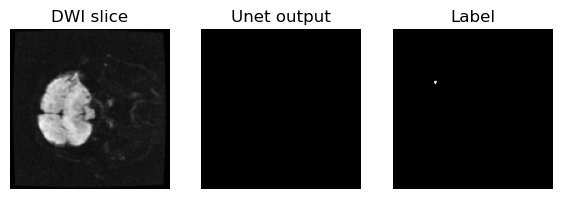

Dice for slice: 0


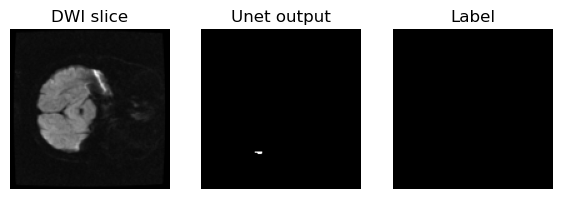

Dice for slice: 0.0


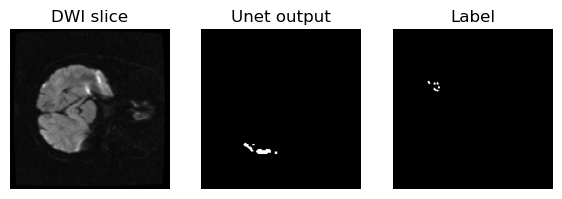

Dice for slice: 0.153


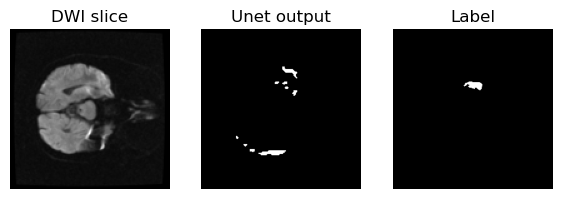

Dice for slice: 0.637


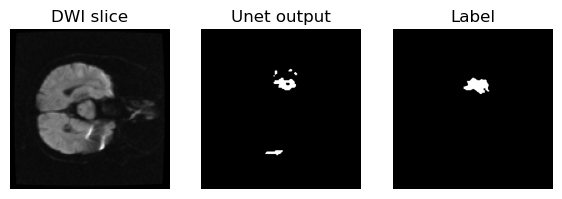

Dice for slice: 0.627


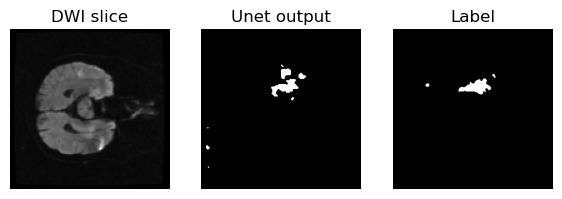

Dice for slice: 0.651


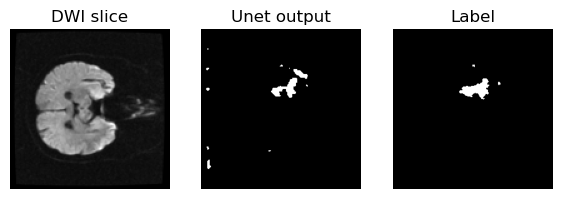

Dice for slice: 0.525


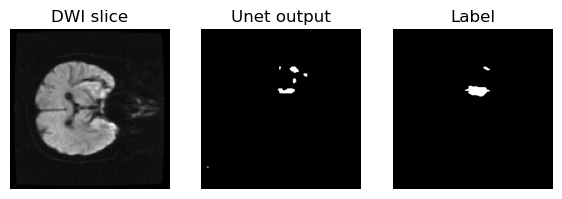

Dice for slice: 0.211


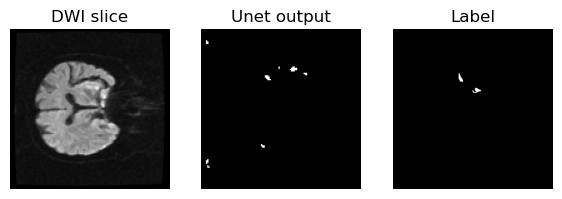

Dice for slice: 0.441


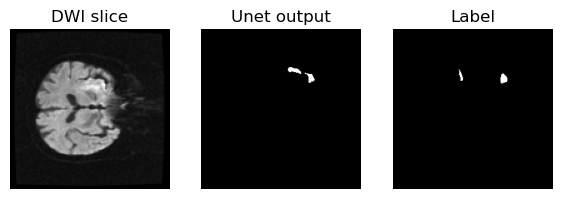

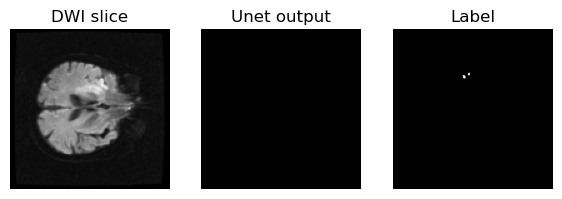

Dice for slice: 0


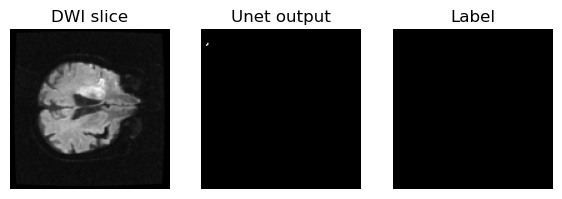

Mean slice dice for subject: 0.325
Volume dice for subject: 0.504
__________________________________
Dice for slice: 0


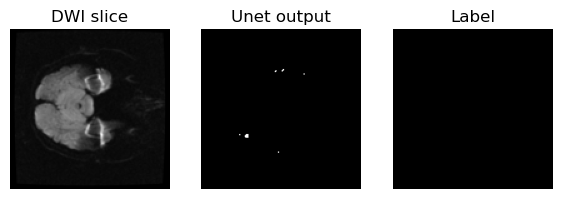

Dice for slice: 0


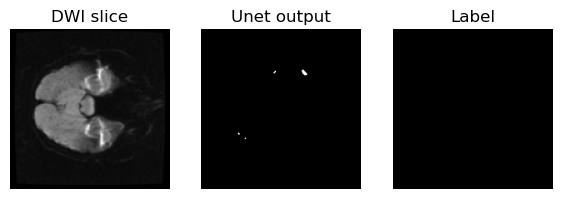

Dice for slice: 0.0


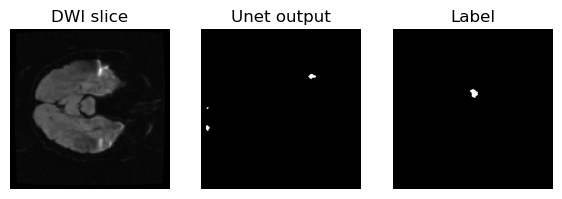

Dice for slice: 0


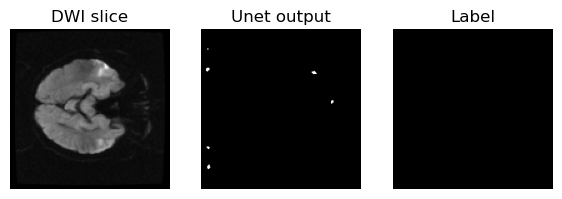

Dice for slice: 0


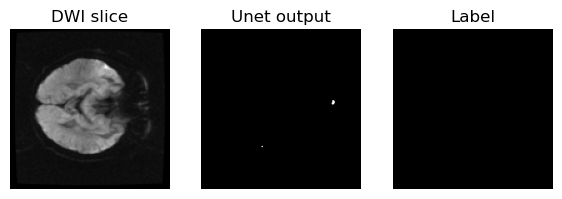

Dice for slice: 0


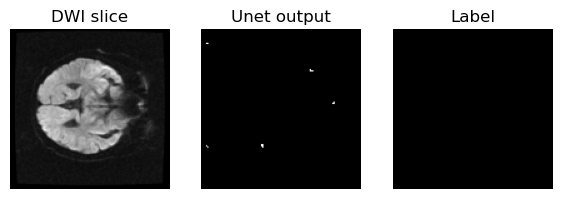

Mean slice dice for subject: 0.0
Volume dice for subject: 0.0
__________________________________
Dice for slice: 0.407


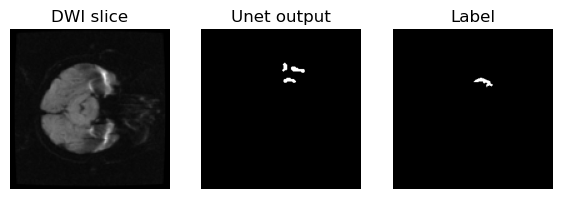

Dice for slice: 0.391


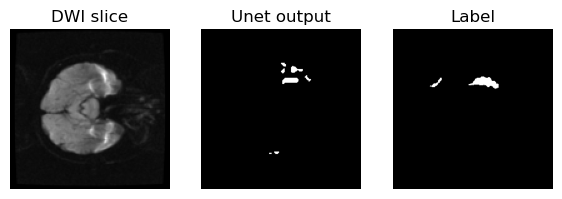

Dice for slice: 0.407


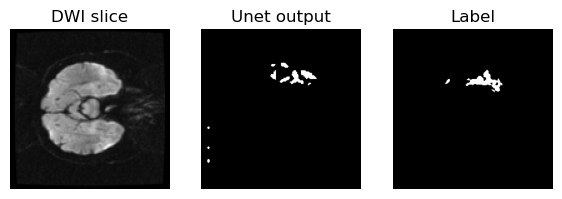

Dice for slice: 0.564


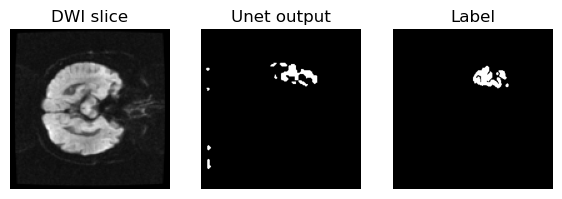

Dice for slice: 0.32


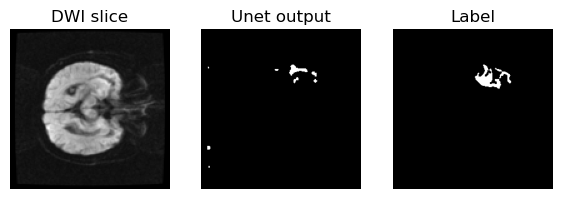

Dice for slice: 0.212


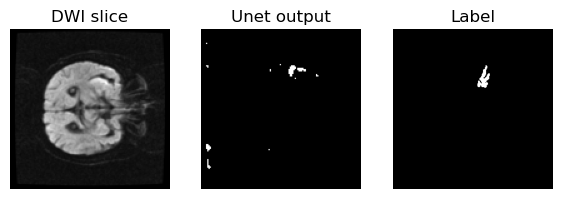

Dice for slice: 0.336


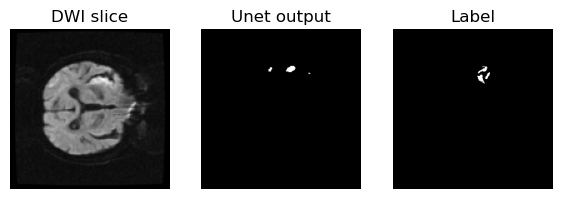

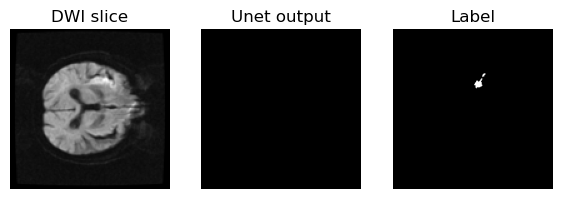

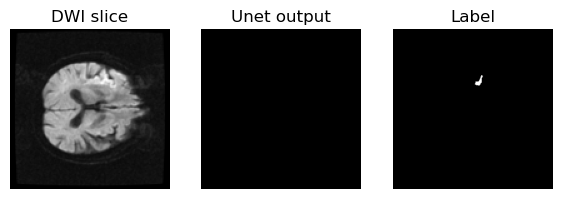

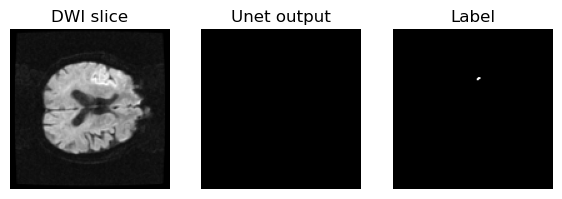

Mean slice dice for subject: 0.377
Volume dice for subject: 0.401
__________________________________
Dice for slice: 0


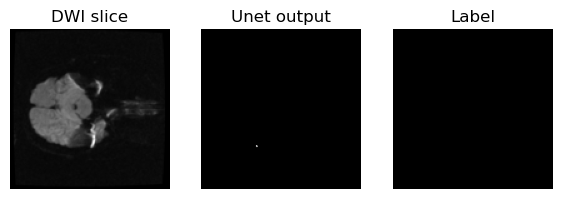

Dice for slice: 0.0


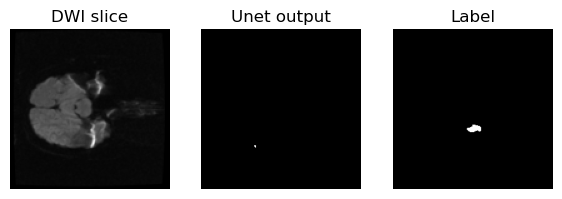

Dice for slice: 0.074


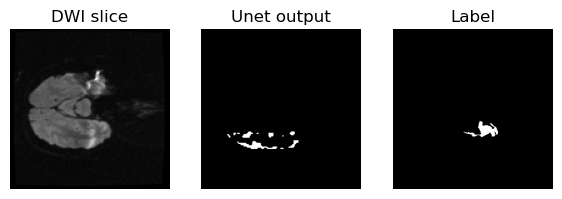

Dice for slice: 0.503


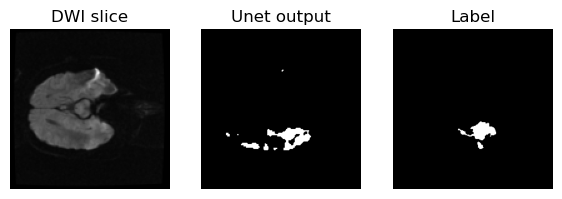

Dice for slice: 0.53


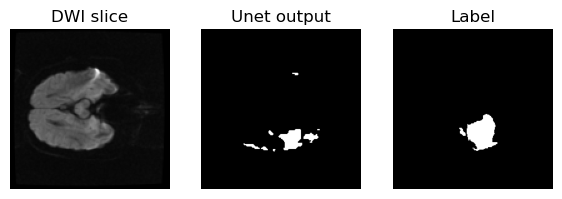

Dice for slice: 0.449


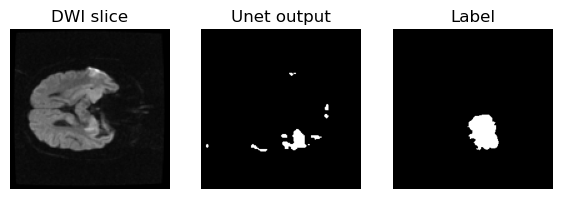

Dice for slice: 0.504


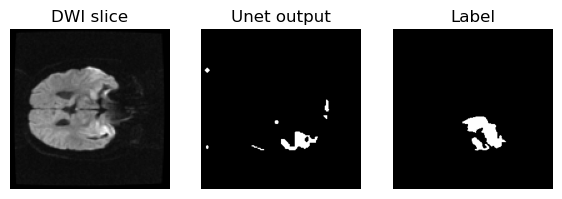

Dice for slice: 0.604


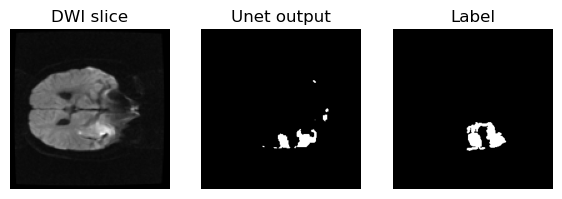

Dice for slice: 0.375


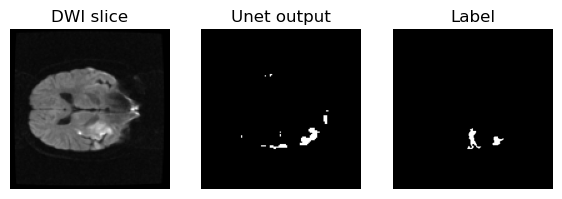

Dice for slice: 0.152


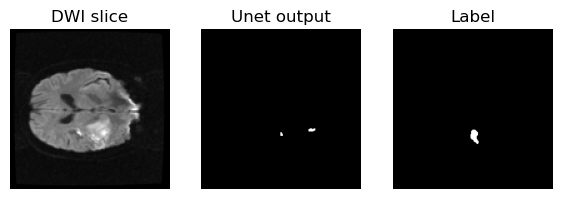

Dice for slice: 0.637


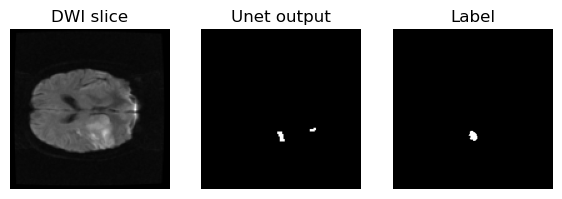

Dice for slice: 0


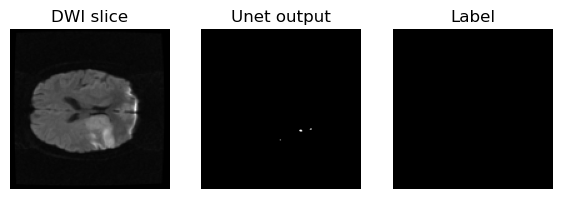

Dice for slice: 0


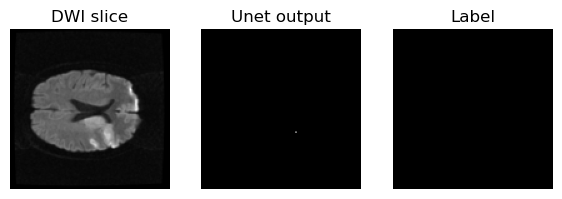

Mean slice dice for subject: 0.294
Volume dice for subject: 0.466
__________________________________
Dice for slice: 0


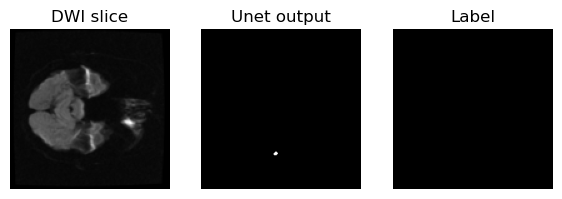

Dice for slice: 0


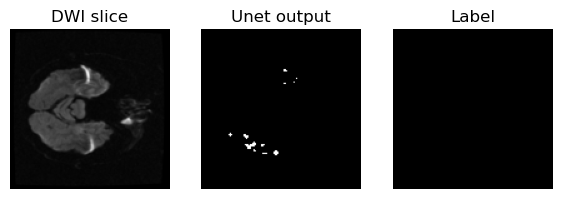

Dice for slice: 0


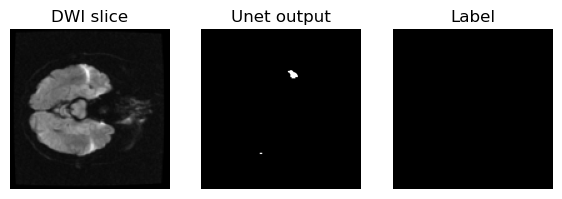

Dice for slice: 0.0


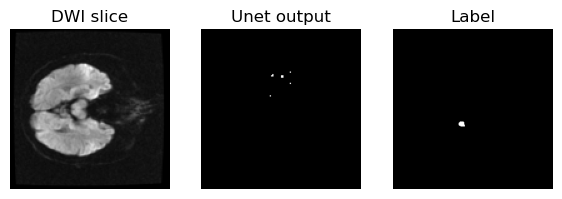

Dice for slice: 0


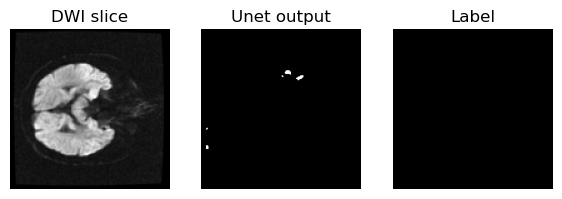

Dice for slice: 0.0


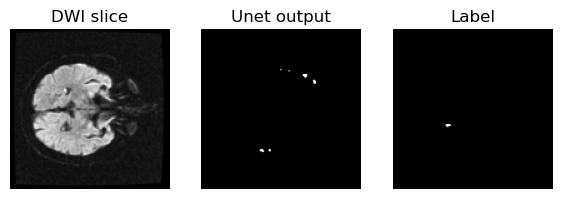

Dice for slice: 0.0


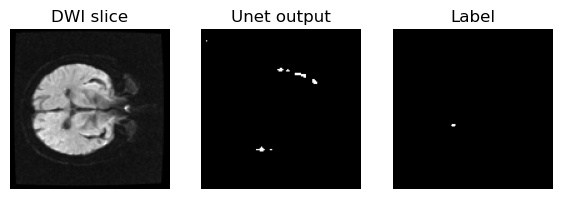

Dice for slice: 0.0


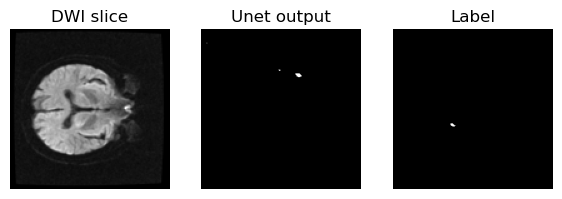

Dice for slice: 0


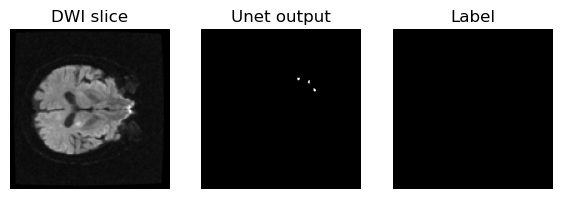

Mean slice dice for subject: 0.0
Volume dice for subject: 0.0
__________________________________
Dice for slice: 0


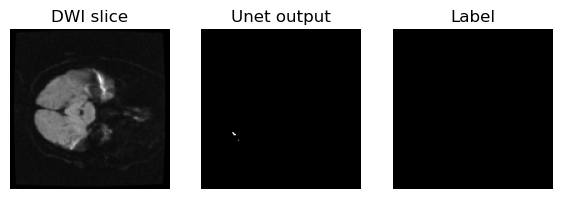

Dice for slice: 0


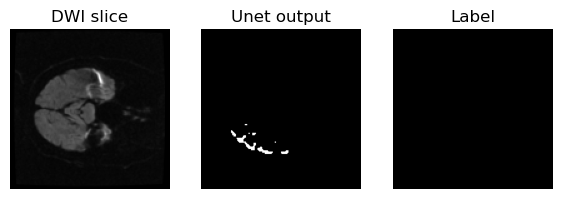

Dice for slice: 0


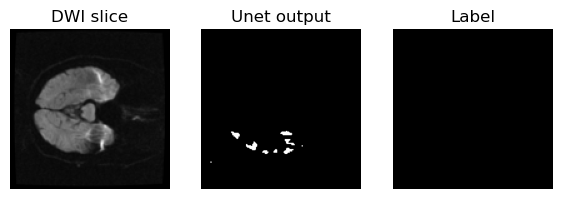

Dice for slice: 0.603


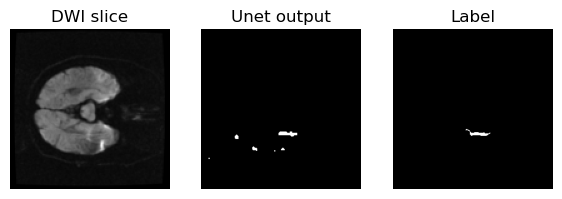

Dice for slice: 0.732


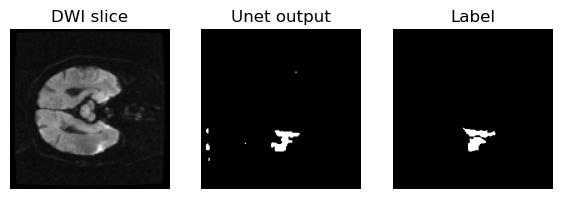

Dice for slice: 0.772


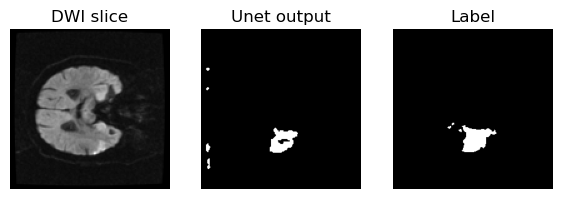

Dice for slice: 0.719


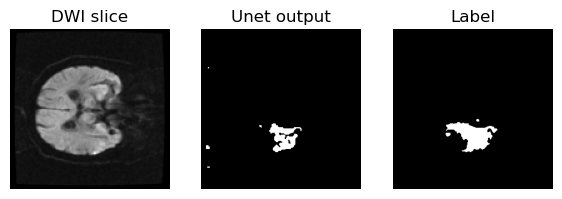

Dice for slice: 0.581


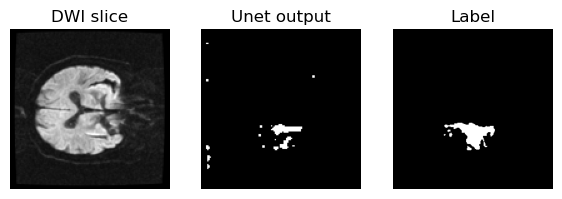

Dice for slice: 0.382


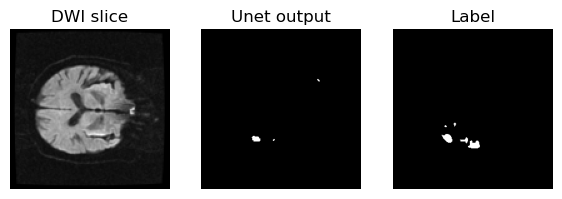

Dice for slice: 0.622


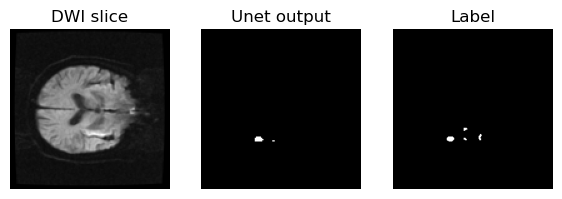

Dice for slice: 0


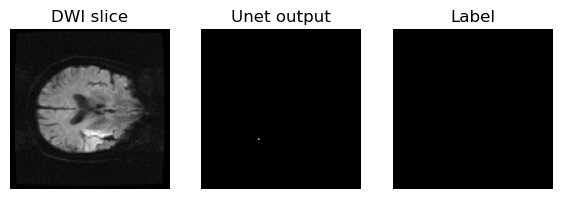

Dice for slice: 0


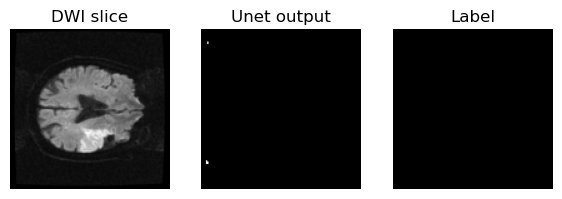

Mean slice dice for subject: 0.368
Volume dice for subject: 0.62
__________________________________
Dice for slice: 0


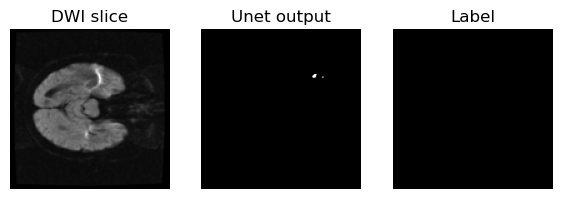

Dice for slice: 0


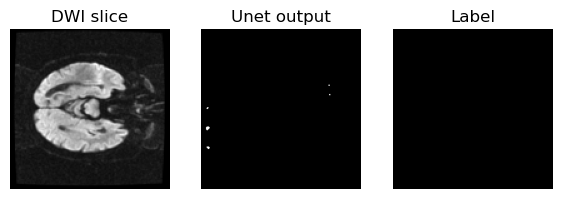

Dice for slice: 0.314


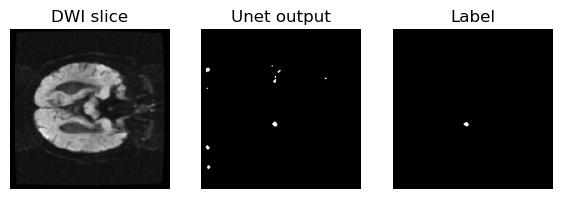

Dice for slice: 0.0


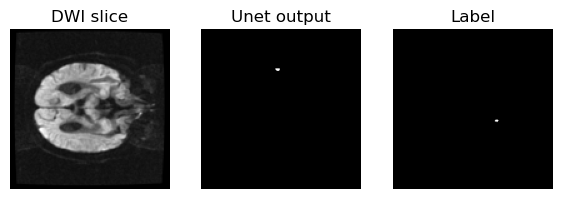

Dice for slice: 0.0


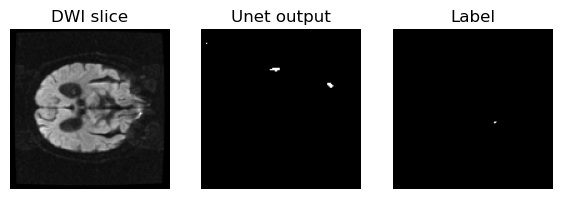

Dice for slice: 0.0


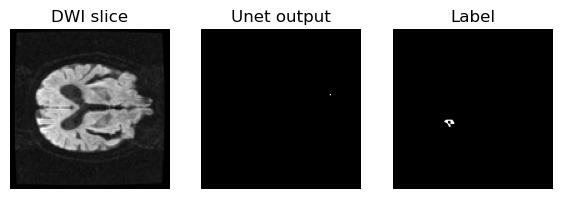

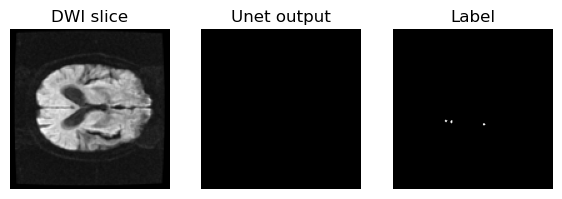

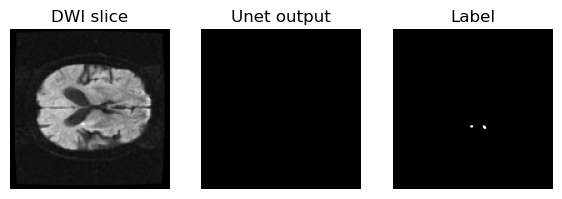

Mean slice dice for subject: 0.052
Volume dice for subject: 0.109
__________________________________
Dice for slice: 0.079


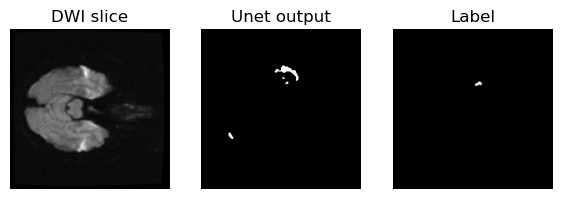

Dice for slice: 0.44


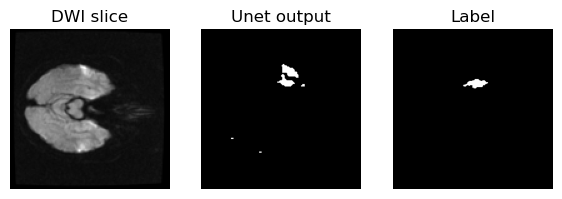

Dice for slice: 0.739


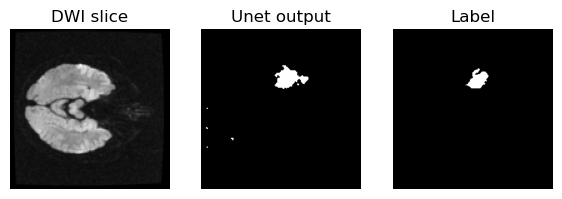

Dice for slice: 0.738


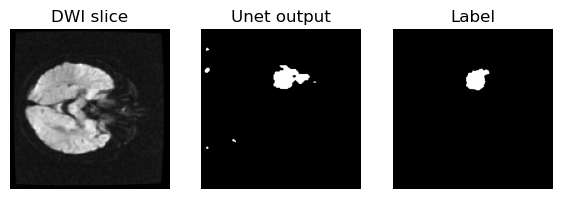

Dice for slice: 0.671


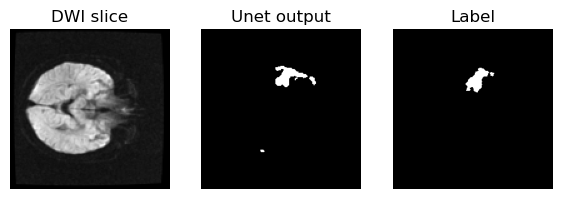

Dice for slice: 0.253


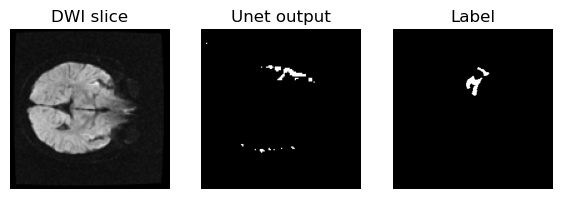

Dice for slice: 0.0


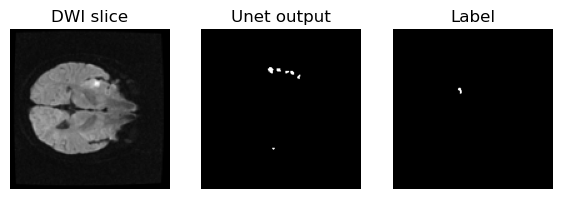

Dice for slice: 0.52


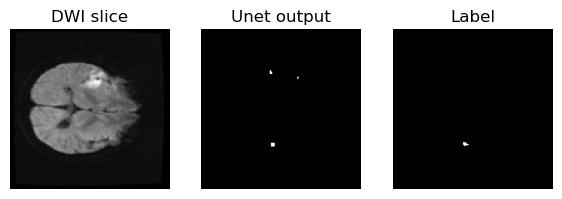

Dice for slice: 0.0


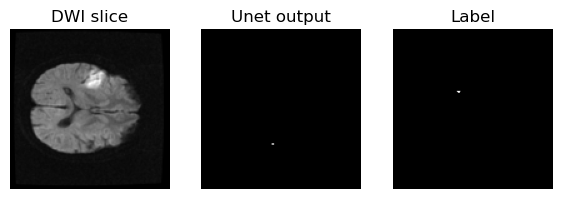

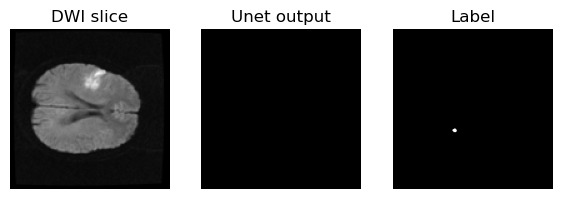

Mean slice dice for subject: 0.382
Volume dice for subject: 0.576
__________________________________
_____________________________________________________
Mean slice dice for each subject: [0.32467221909744376, 0.0, 0.3768422972182726, 0.2943654645133191, 0.0, 0.36761307896104867, 0.052316890881913304, 0.3822535186728478]
Volume dice for each subject: [0.5044058744993325, 0.0, 0.40121902742811716, 0.4662337662337662, 0.0, 0.6200493015612161, 0.10852713178294573, 0.5763236168947056]

Mean slice dice for all subjects: 0.22475793366810565
Mean volume dice for all subjects: 0.3345948398000104


In [4]:
#Test loop:
Dice_slices_subjects = [] #Slice based
Dice_slice_avg_subjects = [] #Slice based
Dice_vol_subjects = [] #Volume based
for x_val, yval in testDataLoader:
    with torch.cuda.amp.autocast():
        output = model(x_val.to(device))
    torch.cuda.empty_cache()
    
    # Dice and Plot
    dice_slices, dice_vol = plotAndDice(yval[0,0,:,:,:], x_val[0,0,:,:,:], output[0,0,:,:,:], trained_on_dataset)
    Dice_vol_subjects.append(dice_vol)
    Dice_slices_subjects.append(dice_slices)
    Dice_slice_avg_subjects.append(mean(dice_slices))
    
    print('Mean slice dice for subject:', round(mean(dice_slices),3))
    print('Volume dice for subject:', round(dice_vol,3))
    print('__________________________________')
print('_____________________________________________________')
print('Mean slice dice for each subject:', Dice_slice_avg_subjects)
print('Volume dice for each subject:', Dice_vol_subjects)
print('')
print('Mean slice dice for all subjects:', mean(Dice_slice_avg_subjects))
print('Mean volume dice for all subjects:', mean(Dice_vol_subjects))

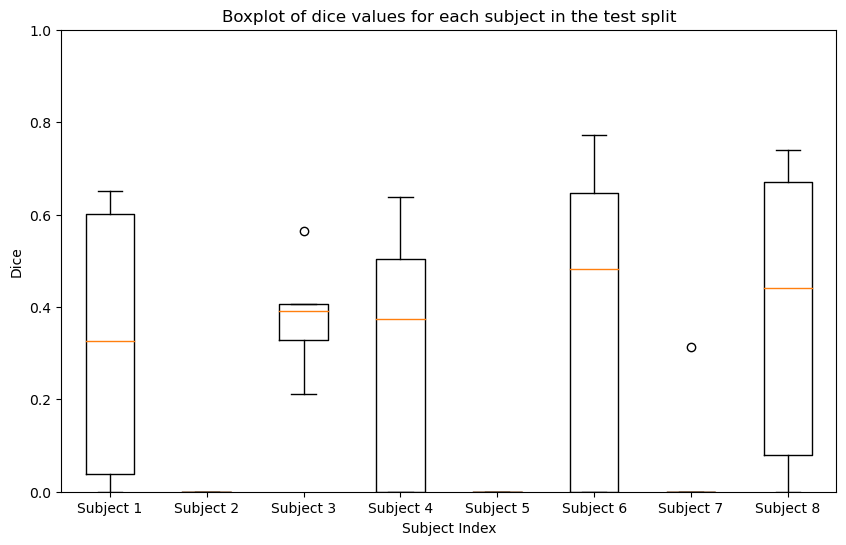

In [5]:
# Example data: a list of lists
data = Dice_slices_subjects

# Create a figure and a set of subplots
plt.figure(figsize=(10, 6))

# Create the boxplot
plt.boxplot(data)

# Adding titles and labels
plt.title('Boxplot of dice values for each subject in the test split')
plt.xlabel('Subject Index')
plt.ylabel('Dice')

# Customize x-axis labels if needed
plt.xticks(range(1, len(data) + 1), ['Subject 1', 'Subject 2', 'Subject 3', 'Subject 4', 'Subject 5', 'Subject 6', 'Subject 7', 'Subject 8'])

# Set y-axis limits
plt.ylim(0, 1)

# Show the plot
plt.show()